<a href="https://colab.research.google.com/github/lsylcy0307/Accented-speech-transcription/blob/main/Data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()
#uploads file

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d rtatman/speech-accent-archive 

 98% 848M/865M [00:04<00:00, 212MB/s]
100% 865M/865M [00:04<00:00, 189MB/s]


In [ ]:
!unzip speech-accent-archive.zip

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import pandas as pd       
import os 
import math 
import numpy as np
import matplotlib.pyplot as plt  
import IPython.display as ipd  # To play sound in the notebook
import librosa
import librosa.display
import os

In [ ]:
#load the data 
df = pd.read_csv("speakers_all.csv", header=0)
# Check the data
print(df.shape, 'is the shape of the dataset') 
print('------------------------') 
print(df.head())

(2172, 12) is the shape of the dataset
------------------------
    age  age_onset              birthplace  ... Unnamed: 9 Unnamed: 10 Unnamed: 11
0  24.0       12.0         koussi, senegal  ...        NaN         NaN         NaN
1  18.0       10.0          buea, cameroon  ...        NaN         NaN         NaN
2  48.0        8.0  hong, adamawa, nigeria  ...        NaN         NaN         NaN
3  42.0       42.0   port-au-prince, haiti  ...        NaN         NaN         NaN
4  40.0       35.0   port-au-prince, haiti  ...        NaN         NaN         NaN

[5 rows x 12 columns]


In [ ]:
files.upload()

In [ ]:
#load the data 
df = pd.read_csv("speakers_all.csv", header=0)
# Check the data
print(df.shape, 'is the shape of the dataset') 
print('------------------------') 
print(df.head())

(2172, 12) is the shape of the dataset
------------------------
    age  age_onset              birthplace  ... Unnamed: 9 Unnamed: 10 Unnamed: 11
0  24.0       12.0         koussi, senegal  ...        NaN         NaN         NaN
1  18.0       10.0          buea, cameroon  ...        NaN         NaN         NaN
2  48.0        8.0  hong, adamawa, nigeria  ...        NaN         NaN         NaN
3  42.0       42.0   port-au-prince, haiti  ...        NaN         NaN         NaN
4  40.0       35.0   port-au-prince, haiti  ...        NaN         NaN         NaN

[5 rows x 12 columns]


In [ ]:
#load the data 
df_mod = pd.read_csv("speakers_all_modified.csv", header=0)
# Check the data
print(df_mod.shape, 'is the shape of the dataset') 
print('------------------------') 
print(df_mod.head())

(172, 9) is the shape of the dataset
------------------------
   age  age_onset                  birthplace  ... speakerid country file_missing?
0   27        2.0  nagpur, maharashtra, india  ...       207   india         False
1   19       10.5            new delhi, india  ...      1202   india         False
2   20        4.0           chandigarh, india  ...      1437   india         False
3   25        4.0            allahabad, india  ...      1440   india         False
4   43       13.0               jaipur, india  ...      1633   india         False

[5 rows x 9 columns]


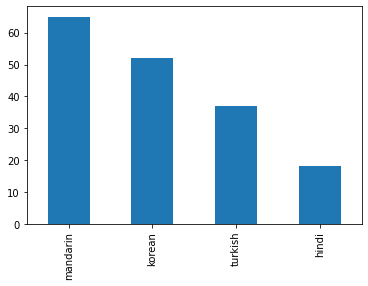

In [ ]:
df_mod['native_language'].value_counts().plot(kind='bar')

In [ ]:
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
# from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd  # To play sound in the notebook
import string

Tokenize the Sentence

In [ ]:

def tokenize_corpus(corpus, num_words=-1):
  # Fit a Tokenizer on the corpus
  if num_words > -1:
    tokenizer = Tokenizer(num_words=num_words)
  else:
    tokenizer = Tokenizer()
  tokenizer.fit_on_texts(corpus)
  return tokenizer

def create_corpus(dataset, field):
  # Remove all other punctuation
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation), '')
  # Make it lowercase
  dataset[field] = dataset[field].str.upper()
  # Make it one long string to split by line
  lyrics = dataset[field].str.cat()
  corpus = lyrics.split('\n')
  # Remove any trailing whitespace
  for l in range(len(corpus)):
    corpus[l] = corpus[l].rstrip()
  # Remove any empty lines
  corpus = [l for l in corpus if l != '']

  return corpus

def create_corpus_string(string_rc):
  # Remove all other punctuation
  string_rc = string_rc.replace('[{}]'.format(string.punctuation), '')
  # Make it lowercase
  string_rc = string_rc.upper()
  # Make it one long string to split by line
  lyrics = string_rc.cat()
  corpus = lyrics.split('\n')
  # Remove any trailing whitespace
  for l in range(len(corpus)):
    corpus[l] = corpus[l].rstrip()
  # Remove any empty lines
  corpus = [l for l in corpus if l != '']

  return corpus

In [ ]:
# Read the transcript from csv
# transcript = pd.read_csv('transcript.csv', dtype=str)
# transcript = transcript.drop(['Unnamed: 0'], axis = 1)

In [ ]:
# transcript.head()

In [ ]:
# Create the corpus using the 'transcript' column containing the transcript
# corpus = create_corpus(dataset, 'transcript')
# # Tokenize the corpus
# tokenizer = tokenize_corpus(corpus, num_words=100)
# total_words = tokenizer.num_words


# sequences = tokenizer.texts_to_sequences(corpus)
# one_hot_results = tokenizer.texts_to_matrix(dataset['transcript'], mode='binary')
# word_index = tokenizer.word_index

# print('Found %s unique tokens.' % len(word_index))

In [ ]:
#transcript words tokenized
# trans_sequences = tokenizer.texts_to_sequences(dataset['transcript'])
# print(trans_sequences)

In [ ]:
#Korean
kr_phonemes = []
kr_word_total = []
kr_word_list = []
counter = 0
new_person = False
new_word = False
word_counter = 0
with open("korean_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1):
            if (words[0]=="."):
                if word_counter == 69: 
                    kr_word_total.append(kr_word_list)
                word_counter = 0
                new_person = True
                kr_phonemes.append(kr_word_total)
                kr_word_total = []
            else:
                if len(words)==5:
                    word_counter = word_counter+1
                    kr_word_total.append(kr_word_list)
                    kr_word_list = []
                    new_word = True
                    kr_word_list.append(words[2])
                else:
                    new_word = False

                if new_word == False:
                    kr_word_list.append(words[2])
        counter = counter+1

In [ ]:
len(kr_phonemes)

52

In [ ]:
kr_phonemes[0].pop(0)
for i in kr_phonemes:
    i.pop(0)

Hindi

In [ ]:
#hindi
hd_phonemes = []
hd_word_total = []
hd_word_list = []
counter = 0
new_person = False
new_word = False
word_counter = 0
with open("hindi_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1):
            if (words[0]=="."):
                if word_counter == 69: 
                    hd_word_total.append(hd_word_list)
                word_counter = 0
                new_person = True
                hd_phonemes.append(hd_word_total)
                hd_word_total = []
            else:
                if len(words)==5:
                    word_counter = word_counter+1
                    hd_word_total.append(hd_word_list)
                    hd_word_list = []
                    new_word = True
                    hd_word_list.append(words[2])
                else:
                    new_word = False

                if new_word == False:
                    hd_word_list.append(words[2])
        counter = counter+1

In [ ]:
len(hd_phonemes)

18

In [ ]:
hd_phonemes[0].pop(0)
for i in hd_phonemes:
    i.pop(0)

Mandarin

In [ ]:
#mandarin
md_phonemes = []
md_word_total = []
md_word_list = []
counter = 0
new_person = False
new_word = False
word_counter = 0
with open("mandarin_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1):
            if (words[0]=="."):
                if word_counter == 69: 
                    md_word_total.append(md_word_list)
                word_counter = 0
                new_person = True
                md_phonemes.append(md_word_total)
                md_word_total = []
            else:
                if len(words)==5:
                    word_counter = word_counter+1
                    md_word_total.append(md_word_list)
                    md_word_list = []
                    new_word = True
                    md_word_list.append(words[2])
                else:
                    new_word = False

                if new_word == False:
                    md_word_list.append(words[2])
        counter = counter+1

In [ ]:
len(md_phonemes)

65

In [ ]:
md_phonemes[0].pop(0)
for i in md_phonemes:
    i.pop(0)

Turkish

In [ ]:
#turkey
tk_phonemes = []
tk_word_total = []
tk_word_list = []
counter = 0
new_person = False
new_word = False
word_counter = 0
with open("turkish_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1):
            if (words[0]=="."):
                if word_counter == 69: 
                    tk_word_total.append(tk_word_list)
                word_counter = 0
                new_person = True
                tk_phonemes.append(tk_word_total)
                tk_word_total = []
            else:
                if len(words)==5:
                    word_counter = word_counter+1
                    tk_word_total.append(tk_word_list)
                    tk_word_list = []
                    new_word = True
                    tk_word_list.append(words[2])
                else:
                    new_word = False

                if new_word == False:
                    tk_word_list.append(words[2])
        counter = counter+1

In [ ]:
print(tk_phonemes

[[[], ['P', 'L', 'IY1', 'Z'], ['K', 'AO1', 'L'], ['S', 'T', 'EH1', 'L', 'AH0'], ['AE1', 'S', 'K'], ['HH', 'ER0'], ['T', 'UW1'], ['B', 'R', 'IH1', 'NG'], ['DH', 'IY1', 'Z'], ['TH', 'IH1', 'NG', 'Z'], ['W', 'IH1', 'TH'], ['HH', 'ER0'], ['F', 'R', 'AH1', 'M'], ['DH', 'AH0'], ['S', 'T', 'AO1', 'R'], ['S', 'IH1', 'K', 'S'], ['S', 'P', 'UW1', 'N', 'Z'], ['AH1', 'V'], ['F', 'R', 'EH1', 'SH'], ['S', 'N', 'OW1'], ['P', 'IY1', 'Z'], ['F', 'AY1', 'V'], ['TH', 'IH1', 'K'], ['S', 'L', 'AE1', 'B', 'Z'], ['AH1', 'V'], ['B', 'L', 'UW1'], ['CH', 'IY1', 'Z'], ['AE1', 'N', 'D'], ['M', 'EY1', 'B', 'IY0'], ['AH0'], ['S', 'N', 'AE1', 'K'], ['F', 'AO1', 'R'], ['HH', 'ER0'], ['B', 'R', 'AH1', 'DH', 'ER0'], ['B', 'AA1', 'B'], ['W', 'IY1'], ['AO1', 'L', 'S', 'OW0'], ['N', 'IY1', 'D'], ['AH0'], ['S', 'M', 'AO1', 'L'], ['P', 'L', 'AE1', 'S', 'T', 'IH0', 'K'], ['S', 'N', 'EY1', 'K'], ['AE1', 'N', 'D'], ['EY1'], ['B', 'IH1', 'G'], ['T', 'OY1'], ['F', 'R', 'AA1', 'G'], ['F', 'AO1', 'R'], ['DH', 'IY0'], ['K', 'IH1', 

In [ ]:
tk_phonemes[0].pop(0)
for i in tk_phonemes:
    i.pop(0)

TIMEFRAMES

In [ ]:
#turkey time frames
timeFrame_all = []
timeFrame_person = []
timeFrame = []
counter = 0
new_person = True
new_word = False
word_counter = 0
with open("turkish_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1): #not 1st, not a new person
            if (words[0]=="."): #indicating the end of a person's record
                if word_counter == 69: #last word
                    timeFrame_person.append(timeFrame) #add this last word's record to the list of the person
                word_counter = 0 #set to 0
                new_person = True #new person coming up
                timeFrame_all.append(timeFrame_person) #add all. record of the person to the total
                timeFrame_person = [] #empty the person's record
            else: #can be 1st and a new person
                if len(words)==5: #new word
                    word_counter = word_counter+1
                    timeFrame_person.append(timeFrame) 
                    timeFrame = []
                    new_word = True
                    timeFrame.append([words[0], words[1]])
                else:
                    new_word = False

                if new_word == False:
                    timeFrame.append([words[0], words[1]])
        counter = counter+1
        
timeFrame_all[0].pop(0)
for i in timeFrame_all:
    i.pop(0)

In [ ]:
len(timeFrame_all[0])

68

In [ ]:
#korea time frames
kr_timeFrame_all = []
kr_timeFrame_person = []
kr_timeFrame = []
counter = 0
new_person = True
new_word = False
word_counter = 0
with open("korean_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1): #not 1st, not a new person
            if (words[0]=="."): #indicating the end of a person's record
                if word_counter == 69: #last word
                    kr_timeFrame_person.append(kr_timeFrame) #add this last word's record to the list of the person
                word_counter = 0 #set to 0
                new_person = True #new person coming up
                kr_timeFrame_all.append(kr_timeFrame_person) #add all. record of the person to the total
                kr_timeFrame_person = [] #empty the person's record
            else: #can be 1st and a new person
                if len(words)==5: #new word
                    word_counter = word_counter+1
                    kr_timeFrame_person.append(kr_timeFrame) 
                    kr_timeFrame = []
                    new_word = True
                    kr_timeFrame.append([words[0], words[1]])
                else:
                    new_word = False

                if new_word == False:
                    kr_timeFrame.append([words[0], words[1]])
        counter = counter+1
        
kr_timeFrame_all[0].pop(0)
for i in kr_timeFrame_all:
    i.pop(0)

In [ ]:
len(kr_timeFrame_all[0])

68

In [ ]:
#mandarin time frames
md_timeFrame_all = []
md_timeFrame_person = []
md_timeFrame = []
counter = 0
new_person = True
new_word = False
word_counter = 0
with open("mandarin_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1): #not 1st, not a new person
            if (words[0]=="."): #indicating the end of a person's record
                if word_counter == 69: #last word
                    md_timeFrame_person.append(md_timeFrame) #add this last word's record to the list of the person
                word_counter = 0 #set to 0
                new_person = True #new person coming up
                md_timeFrame_all.append(md_timeFrame_person) #add all. record of the person to the total
                md_timeFrame_person = [] #empty the person's record
            else: #can be 1st and a new person
                if len(words)==5: #new word
                    word_counter = word_counter+1
                    md_timeFrame_person.append(md_timeFrame) 
                    md_timeFrame = []
                    new_word = True
                    md_timeFrame.append([words[0], words[1]])
                else:
                    new_word = False

                if new_word == False:
                    md_timeFrame.append([words[0], words[1]])
        counter = counter+1
        
md_timeFrame_all[0].pop(0)
for i in md_timeFrame_all:
    i.pop(0)

In [ ]:
#hindi time frames
hd_timeFrame_all = []
hd_timeFrame_person = []
hd_timeFrame = []
counter = 0
new_person = True
new_word = False
word_counter = 0
with open("hindi_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1): #not 1st, not a new person
            if (words[0]=="."): #indicating the end of a person's record
                if word_counter == 69: #last word
                    hd_timeFrame_person.append(hd_timeFrame) #add this last word's record to the list of the person
                word_counter = 0 #set to 0
                new_person = True #new person coming up
                hd_timeFrame_all.append(hd_timeFrame_person) #add all. record of the person to the total
                hd_timeFrame_person = [] #empty the person's record
            else: #can be 1st and a new person
                if len(words)==5: #new word
                    word_counter = word_counter+1
                    hd_timeFrame_person.append(hd_timeFrame) 
                    hd_timeFrame = []
                    new_word = True
                    hd_timeFrame.append([words[0], words[1]])
                else:
                    new_word = False

                if new_word == False:
                    hd_timeFrame.append([words[0], words[1]])
        counter = counter+1
        
hd_timeFrame_all[0].pop(0)
for i in hd_timeFrame_all:
    i.pop(0)

In [ ]:
len(hd_timeFrame_all[0])

68

INSERT MISSING VALUES

In [ ]:
!pip install sox
import sox

SoX could not be found!

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


In [ ]:
# split audio files on words using noize
!pip install pydub
from pydub import AudioSegment
from pydub.silence import split_on_silence
!apt install -y ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
md_timeFrame_all[0].insert(0, [['0','11900001'],['11900001','12200001'],['12200001','14000001'],['14000001','14500001']])
hd_timeFrame_all[0].insert(0, [['0','4500000'],['4500000','4800000'],['4800000','5300000'],['5300000','6000000']])
#turkey
timeFrame_all[0].insert(0, [['0','12400000'],['12400000','12700000'],['12700000','14000000'],['14000000','14500000']])
kr_timeFrame_all[0].insert(0, [['0','17300000'],['17300000','17600000'],['17600000','18500000'],['18500000','19500000']])

In [ ]:
kr_phonemes[0].insert(0,['P','L','IY1','Z'])
tk_phonemes[0].insert(0,['P','L','IY1','Z'])
md_phonemes[0].insert(0,['P','L','IY1','Z'])
hd_phonemes[0].insert(0,['P','L','IY1','Z'])

In [ ]:
md_timeFrame_all[0]

[[['0', '11900001'],
  ['11900001', '12200001'],
  ['12200001', '14000001'],
  ['14000001', '14500001']],
 [['14500000', '16400000'],
  ['16400000', '17900000'],
  ['17900000', '18200000']],
 [['18200000', '20400000'],
  ['20400000', '20700000'],
  ['20700000', '24200000'],
  ['24200000', '26100000'],
  ['26100000', '26500000']],
 [['26500000', '28500000'],
  ['28500000', '29200000'],
  ['29200000', '30300000']],
 [['30300000', '31400000'], ['31400000', '33600000']],
 [['33600000', '34300000'], ['34300000', '34900000']],
 [['34900000', '36000000'],
  ['36000000', '37300000'],
  ['37300000', '37600000'],
  ['37600000', '39500000']],
 [['39500000', '40000000'],
  ['40000000', '40900000'],
  ['40900000', '41400000']],
 [['41400000', '42500000'],
  ['42500000', '43200000'],
  ['43200000', '45400000'],
  ['45400000', '48400000']],
 [['48400000', '49500000'],
  ['49500000', '50200000'],
  ['50200000', '51100000']],
 [['51100000', '52500000'], ['52500000', '54900000']],
 [['54900000', '576000

In [ ]:
kr_timeFrame_all[0][0]

[['0', '17300000'],
 ['17300000', '17600000'],
 ['17600000', '18500000'],
 ['18500000', '19500000']]

In [ ]:
second_kr = (17300000/10000000 + 0.0125)*(11000/11025)
second_kr_end = (17600000/10000000 + 0.0125)*(11000/11025)
(17300000/10000000 + 0.0125)*(11000/11025)
(17600000/10000000 + 0.0125)*(11000/11025)
(18500000/10000000 + 0.0125)*(11000/11025)
(19500000/10000000 + 0.0125)*(11000/11025)

1.958049886621315

ONE HOT ENCODING The WoRDS

Getting Audio Features

In [ ]:
!mkdir wav_file

In [ ]:
# upload wav files converted from mp3 files
counter=0
for index,filename in enumerate(df_mod.filename):
    path = 'recordings/recordings/{0}.mp3'.format(filename) 
    os.mkdir("wav_file/%s" % filename)
    dst = 'wav_file/{0}/{0}.wav'.format(filename)
    sound = AudioSegment.from_mp3(path)
    sound.export(dst, format="wav")
    counter=counter+1   
print(counter)


172


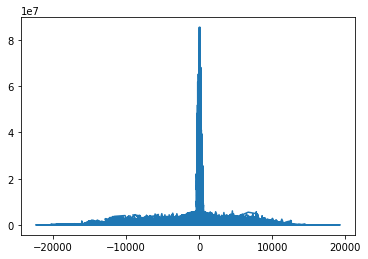

In [ ]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
rate, data = wav.read('wav_file/hindi1/hindi1.wav')
fft_out = fft(data)
%matplotlib inline
plt.plot(data, np.abs(fft_out))
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (9, 7)
sampFreq, sound = wavfile.read('wav_file/hindi1/hindi1.wav')

In [ ]:
sound.dtype, sampFreq

(dtype('int16'), 44100)

In [ ]:
sound

array([ -83, -106,  -84, ...,  -40,   -8,  -20], dtype=int16)

In [ ]:
sound = sound / 2.0**15
sound

array([-0.00253296, -0.00323486, -0.00256348, ..., -0.0012207 ,
       -0.00024414, -0.00061035])

In [ ]:
sound.shape

(1159168,)

0.6213915526866913


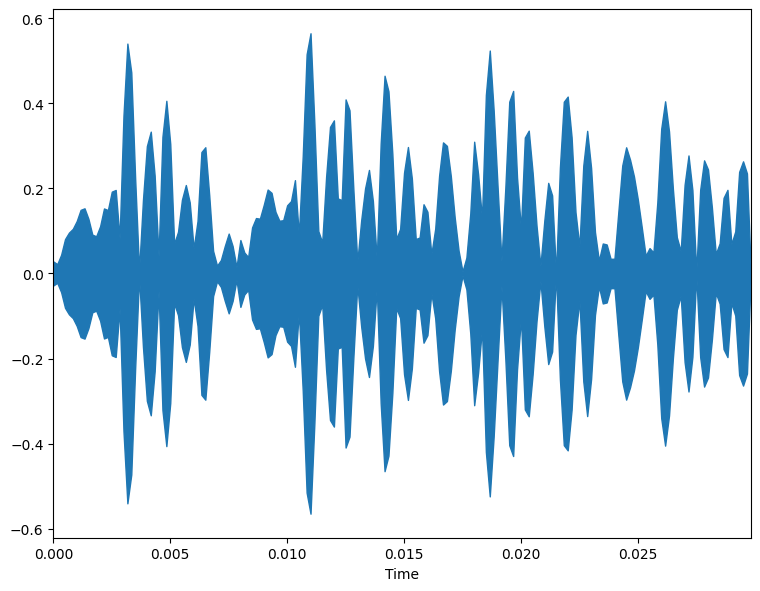

In [ ]:
SAMPLE_RATE = 6000
fname_f = 'wav_file/hindi1/hindi1.wav' 

a = (17300000/10000000 + 0.0125)*(11000/11025)
b = (17600000/10000000 + 0.0125)*(11000/11025)
c = (18500000/10000000 + 0.0125)*(11000/11025)
d = (19500000/10000000 + 0.0125)*(11000/11025)

# audio, sr = librosa.load(fname_f, sr=SAMPLE_RATE, duration = 1.8582766439909297-1.7684807256235826, offset=1.7684807256235826)
y_1, sr = librosa.load(fname_f, sr=SAMPLE_RATE, duration = a-0.4 ,offset=0.4)
y_2, sr = librosa.load(fname_f, sr=SAMPLE_RATE, duration = b-a ,offset=a)
y_3, sr = librosa.load(fname_f, sr=SAMPLE_RATE, duration = c-b ,offset=b)
y_4, sr = librosa.load(fname_f, sr=SAMPLE_RATE, duration = d-c ,offset=c)
# 
# plt.figure(figsize=(12, 3))
plt.figure()
librosa.display.waveplot(y_2, sr=sr)
xmin, xmax, ymin, ymax = plt.axis()
print(ymax)
# plt.title('Audio sampled at 6000 hrz')

In [ ]:
len(y_2)

180

In [ ]:
print("{0},{1},{2},{3}".format(a,b,c,d))


1.738548752834467,1.7684807256235826,1.8582766439909297,1.958049886621315


In [ ]:
print(b-a)

0.029931972789115635


In [ ]:
max(y_4)

0.073806316

GET PEAKS USinG PROMINENCE

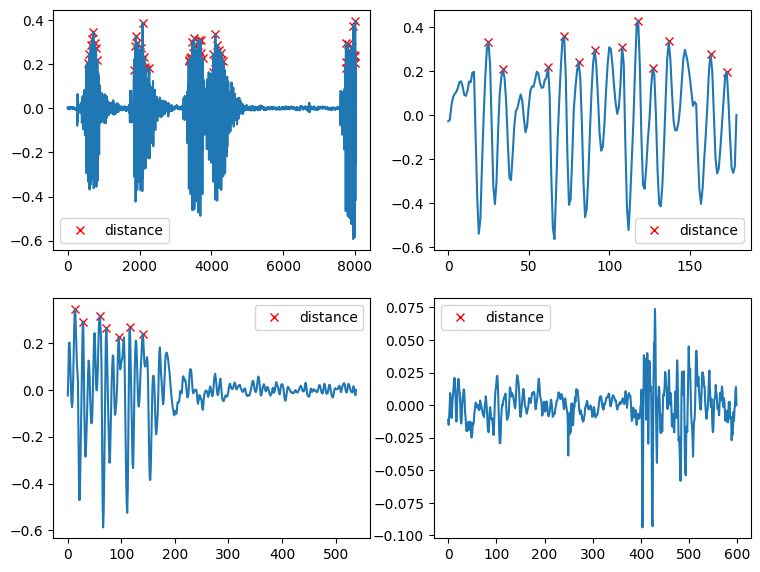

In [ ]:
#https://stackoverflow.com/questions/1713335/peak-finding-algorithm-for-python-scipy
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks, peak_prominences

peaks, _ = find_peaks(y_1, prominence=0.4)
peaks2, _ = find_peaks(y_2, prominence=0.4)      
peaks3, _ = find_peaks(y_3, prominence=0.4)
peaks4, _ = find_peaks(y_4, prominence=0.4)     
plt.subplot(2, 2, 1)
plt.plot(peaks, y_1[peaks], "xr"); plt.plot(y_1); plt.legend(['distance'])
plt.subplot(2, 2, 2)
plt.plot(peaks2, y_2[peaks2], "xr"); plt.plot(y_2); plt.legend(['distance'])
plt.subplot(2, 2, 3)
plt.plot(peaks3, y_3[peaks3], "xr"); plt.plot(y_3); plt.legend(['distance'])
plt.subplot(2, 2, 4)
plt.plot(peaks4, y_4[peaks4], "xr"); plt.plot(y_4); plt.legend(['distance'])
plt.show()

In [ ]:
#peaks of waves
peaks #x val in plot

array([ 552,  595,  618,  637,  677,  714,  751,  788,  825, 1844, 1885,
       1897, 1931, 1943, 1978, 1989, 2025, 2037, 2073, 2085, 2112, 2135,
       2161, 2186, 2270, 3368, 3381, 3418, 3431, 3469, 3481, 3494, 3521,
       3533, 3573, 3587, 3631, 3643, 3655, 3700, 3711, 3757, 4042, 4056,
       4099, 4113, 4156, 4170, 4227, 4269, 4283, 4338, 7739, 7750, 7759,
       7799, 7808, 7850, 7859, 7901, 7910, 7919, 7950, 7959, 7969, 7997,
       8008, 8017])

In [ ]:
y_1[peaks] #y val of peaks in plot

array([0.20454273, 0.24612665, 0.19163428, 0.2850696 , 0.3117335 ,
       0.34317696, 0.29367715, 0.27430224, 0.2185795 , 0.1710267 ,
       0.2808045 , 0.327683  , 0.1803302 , 0.29740024, 0.20099775,
       0.25633895, 0.25637376, 0.27330056, 0.21791065, 0.3862191 ,
       0.18137552, 0.23135173, 0.1862267 , 0.17814162, 0.18328711,
       0.21264447, 0.21823902, 0.22685473, 0.23389612, 0.29984486,
       0.2506994 , 0.22270688, 0.3193329 , 0.28146875, 0.22023956,
       0.26302475, 0.25308475, 0.3107183 , 0.23190409, 0.31093323,
       0.24819085, 0.22683752, 0.16591877, 0.24695203, 0.2107157 ,
       0.3357455 , 0.2136135 , 0.28475603, 0.26431125, 0.21701035,
       0.25063112, 0.21241638, 0.18416911, 0.29392657, 0.2116222 ,
       0.21110833, 0.29165074, 0.20709144, 0.25201342, 0.22371538,
       0.2796546 , 0.20433725, 0.23592333, 0.37454316, 0.23888756,
       0.20697851, 0.39656603, 0.23584232], dtype=float32)

In [ ]:
# of peaks
len(peaks)

68

GET CRESTS USING PROMINENCE

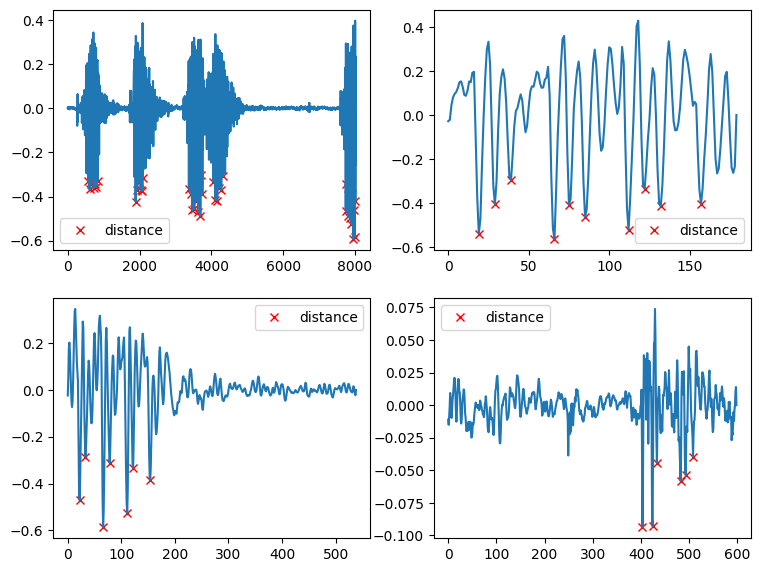

In [ ]:
#crests
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks, peak_prominences

y_1_inverted = -y_1
y_2_inverted = -y_2
y_3_inverted = -y_3
y_4_inverted = -y_4

crest, _ = find_peaks(y_1_inverted, prominence=0.5)
crest2, _ = find_peaks(y_2_inverted, prominence=0.5)      
crest3, _ = find_peaks(y_3_inverted, prominence=0.5)
crest4, _ = find_peaks(y_4_inverted, prominence=0.073806316)     
plt.subplot(2, 2, 1)
plt.plot(crest, y_1[crest], "xr"); plt.plot(y_1); plt.legend(['distance'])
plt.subplot(2, 2, 2)
plt.plot(crest2, y_2[crest2], "xr"); plt.plot(y_2); plt.legend(['distance'])
plt.subplot(2, 2, 3)
plt.plot(crest3, y_3[crest3], "xr"); plt.plot(y_3); plt.legend(['distance'])
plt.subplot(2, 2, 4)
plt.plot(crest4, y_4[crest4], "xr"); plt.plot(y_4); plt.legend(['distance'])
plt.show()

In [ ]:
len(crest)

45

In [ ]:
y_1[crest]

array([-0.33159664, -0.3680815 , -0.34521085, -0.319807  , -0.36198235,
       -0.34419203, -0.35582834, -0.32838103, -0.42308754, -0.36947966,
       -0.33349177, -0.37180746, -0.37578517, -0.31682843, -0.3648739 ,
       -0.38961712, -0.46261096, -0.2769766 , -0.4581047 , -0.29202268,
       -0.42192844, -0.27017754, -0.47198695, -0.31494847, -0.48756376,
       -0.30156726, -0.3895356 , -0.333227  , -0.41425866, -0.4188229 ,
       -0.36113206, -0.3704976 , -0.30832478, -0.46628758, -0.34133807,
       -0.48868343, -0.36022687, -0.49749678, -0.29229033, -0.5251105 ,
       -0.38734695, -0.5929251 , -0.46198335, -0.58402926, -0.41902548],
      dtype=float32)

In [ ]:
#frequency


In [ ]:
def prom_crest_and_troughs(timeFrame, filename):
  SAMPLE_RATE = 6000
  fname_f = 'wav_file/{0}/{0}.wav'.format(filename)

  startTime = timeFrame[0]
  endTime = timeFrame[1]
  startTime = (startTime/10000000 + 0.0125)*(11000/11025)
  endTime = (endTime/10000000 + 0.0125)*(11000/11025)
  duration = endTime - startTime

  x, sr = librosa.load(fname_f, sr=SAMPLE_RATE, duration = duration, offset=startTime)
  ymax = max(x)

  peaks, _ = find_peaks(x, prominence=ymax)

  x_inverted = -x
  crests, _ = find_peaks(x_inverted, prominence=ymax)

  x_peaks = peaks
  y_peaks = x[peaks]

  x_troughs = crests
  y_troughs = x[crests]

  return x_peaks, y_peaks, x_troughs, y_troughs


In [ ]:
def all_crest_and_troughs(timeFrame, filename):
  SAMPLE_RATE = 6000
  fname_f = 'wav_file/{0}/{0}.wav'.format(filename)

  startTime = timeFrame[0]
  endTime = timeFrame[1]
  startTime = (startTime/10000000 + 0.0125)*(11000/11025)
  endTime = (endTime/10000000 + 0.0125)*(11000/11025)
  duration = endTime - startTime

  x, sr = librosa.load(fname_f, sr=SAMPLE_RATE, duration = duration ,offset=startTime)

  peaks, _ = find_peaks(x)

  x_inverted = -x
  crests, _ = find_peaks(x_inverted)

  x_peaks = peaks
  y_peaks = x[peaks]

  x_troughs = crests
  y_troughs = x[crests]

  return x_peaks, y_peaks, x_troughs, y_troughs


In [ ]:
transcript = "Please call Stella  Ask her to bring these things with her from the store Six spoons of fresh snow peas five thick slabs of blue cheese and maybe a snack for her brother Bob We also need a small plastic snake and a big toy frog for the kids She can scoop these things into three red bags and we will go meet her Wednesday at the train station"
words = transcript.split()
words[:5]

['Please', 'call', 'Stella', 'Ask', 'her']

In [ ]:
from sklearn.preprocessing import LabelBinarizer
words_encoder = LabelBinarizer()
words_encoder.fit(words)
transformed = words_encoder.transform([words[2],words[1]])
# df_person = pd.concat([df_person, ohe_df], axis=1)

In [ ]:
transformed

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
timeFrame_all[0][1]

[['14500000', '16000000'], ['16000000', '16500000'], ['16500000', '17300000']]

CONVERT

In [ ]:
# Read the transcript from csv
dataset = pd.read_csv('transcript.csv', dtype=str)
dataset = dataset.drop(['Unnamed: 0'], axis = 1)
dataset.head()

,transcript
0,Please call Stella Ask her to bring these thi...


In [ ]:

def tokenize_corpus(corpus, num_words=-1):
  # Fit a Tokenizer on the corpus
  if num_words > -1:
    tokenizer = Tokenizer(num_words=num_words)
  else:
    tokenizer = Tokenizer()
  tokenizer.fit_on_texts(corpus)
  return tokenizer

def create_corpus(dataset, field):
  # Remove all other punctuation
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation), '')
  # Make it lowercase
  dataset[field] = dataset[field].str.upper()
  # Make it one long string to split by line
  lyrics = dataset[field].str.cat()
  corpus = lyrics.split('\n')
  # Remove any trailing whitespace
  for l in range(len(corpus)):
    corpus[l] = corpus[l].rstrip()
  # Remove any empty lines
  corpus = [l for l in corpus if l != '']

  return corpus

def create_corpus_string(string_rc):
  # Remove all other punctuation
  string_rc = string_rc.replace('[{}]'.format(string.punctuation), '')
  # Make it lowercase
  string_rc = string_rc.upper()
  # Make it one long string to split by line
  lyrics = string_rc.cat()
  corpus = lyrics.split('\n')
  # Remove any trailing whitespace
  for l in range(len(corpus)):
    corpus[l] = corpus[l].rstrip()
  # Remove any empty lines
  corpus = [l for l in corpus if l != '']

  return corpus

In [ ]:
# Create the corpus using the 'transcript' column containing the transcript
corpus = create_corpus(dataset, 'transcript')
# Tokenize the corpus
tokenizer = tokenize_corpus(corpus, num_words=100)
total_words = tokenizer.num_words


sequences = tokenizer.texts_to_sequences(dataset['transcript'])
one_hot_results = tokenizer.texts_to_matrix(dataset['transcript'], mode='binary')
word_index = tokenizer.word_index


In [ ]:
word_index["please"]

10

In [ ]:
from sklearn.preprocessing import LabelBinarizer
words_encoder = LabelBinarizer()
words_encoder.fit(words)
transformed = words_encoder.transform(words)

In [ ]:
transformed[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
cnt = 0
person = hd_phonemes[0]
rows = []
for word in words:
    word_tf = []
    search = word.lower()
    timeframes = hd_timeFrame_all[0][cnt]
    for i in timeframes:
        timeframe = [int(i[0]), int(i[1])]
        word_tf.append(timeframe)
    rows.append([search, person[cnt], word_tf, word_index[search], transformed[cnt]])
    cnt+=1

df_person_manual = pd.DataFrame(rows, columns=["word", "phonemes","word_timeframes","word_index", "word_vec"])
df_person_manual.head()

,word,phonemes,word_timeframes,word_index,word_vec
0,please,"[P, L, IY1, Z]","[[0, 4500000], [4500000, 4800000], [4800000, 5...",10,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,call,"[K, AO1, L]","[[6000000, 6500000], [6500000, 7500000], [7500...",11,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,stella,"[S, T, EH1, L, AH0]","[[8000000, 8900000], [8900000, 9600000], [9600...",12,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,ask,"[AE1, S, K]","[[11300000, 11600000], [11600000, 11900000], [...",13,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,her,"[HH, ER0]","[[12200000, 16600000], [16600000, 18000000]]",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
#finding prominent crest and troughs
prom_peak_x = []
prom_peak_y = []

prom_trough_x = []
prom_trough_y =[]

counter=0
for index,timeframes in enumerate(df_person_manual.word_timeframes):
    word_peak_x = []
    word_peak_y = []
    word_trough_x = []
    word_trough_y = []

    for timeframe in timeframes:
      x_peaks, y_peaks, x_troughs, y_troughs = prom_crest_and_troughs(timeframe, "hindi1")
      word_peak_x.append(x_peaks)
      word_peak_y.append(y_peaks)
      word_trough_x.append(x_troughs)
      word_trough_y.append(y_troughs)

    prom_peak_x.append(word_peak_x)
    prom_peak_y.append(word_peak_y)
    prom_trough_x.append(word_trough_x)
    prom_trough_y.append(word_trough_y)

    counter+=1

print(counter)

69


In [ ]:
prom_peak_x[0]

[array([2599]),
 array([145, 164]),
 array([ 28,  46,  69,  88, 109, 129, 166, 202, 240, 277]),
 array([13, 36])]

In [ ]:
prom_peak_y[3]

[array([0.05156945, 0.03580549, 0.03706294, 0.04860812, 0.02743304,
        0.03467818, 0.03362136, 0.0321382 ], dtype=float32),
 array([0.20102182, 0.20980248, 0.1137529 , 0.21363296], dtype=float32),
 array([0.23623264, 0.12771782, 0.30872777, 0.2586282 , 0.23256652,
        0.30525598, 0.28993315, 0.21586816, 0.21930556, 0.26570663,
        0.25321645, 0.31106135, 0.22709715, 0.21561174, 0.30195862,
        0.24298914, 0.15965798, 0.21930988], dtype=float32),
 array([0.16716485, 0.15460221, 0.16672567, 0.24141519, 0.21123727,
        0.34006718, 0.18481618], dtype=float32),
 array([0.28013638, 0.19001786, 0.20788145, 0.25891635, 0.21618734,
        0.2544769 , 0.18416892, 0.21290152, 0.17053127, 0.1327893 ],
       dtype=float32)]

In [ ]:
#find wavelength

#finding all crest and troughs
all_peak_x = []
all_peak_y = []

all_trough_x = []
all_trough_y =[]

all_wavelength_av = []

counter=0
for index,timeframes in enumerate(df_person_manual.word_timeframes):
    word_peak_x = []
    word_peak_y = []
    word_trough_x = []
    word_trough_y = []

    word_wavelength_av = []


    for timeframe in timeframes:
      x_peaks, y_peaks, x_troughs, y_troughs = all_crest_and_troughs(timeframe, "hindi1")
      word_peak_x.append(x_peaks)
      word_peak_y.append(y_peaks)
      word_trough_x.append(x_troughs)
      word_trough_y.append(y_troughs)
    
      phoneme_wl_sum = 0
      endval = 0

      if(len(x_peaks)>len(x_troughs)):
          endval = len(x_troughs)
      elif (len(x_peaks)<len(x_troughs)):
          endval = len(x_peaks)
      else:
          endval = len(x_peaks)

      #find average of phonemes
      for i in range(0, endval-1):
        difference = abs(x_peaks[i]-x_troughs[i])
        phoneme_wl_sum += difference
      
      wl_av = phoneme_wl_sum/(endval-1)
      word_wavelength_av.append(wl_av)

    all_wavelength_av.append(word_wavelength_av)

    #---datapoints of peaks and troughs
    all_peak_x.append(word_peak_x)
    all_peak_y.append(word_peak_y)
    all_trough_x.append(word_trough_x)
    all_trough_y.append(word_trough_y)

    counter+=1


print(counter)





69


In [ ]:
all_wavelength_av[2] #3 word av wavelength of each phonemes

[3.1666666666666665,
 2.506172839506173,
 5.589743589743589,
 5.0,
 5.538461538461538]

In [ ]:
len(all_peak_x)

69

In [ ]:
all_peak_x[2] #3rd word - "STELLA" - 5 phonemes

[array([  1,  13,  24,  37,  40,  50,  64,  70,  72,  86,  88, 100, 115,
        117, 124, 136, 151, 156, 165, 172, 187, 194, 197, 199, 203, 210,
        219, 222, 226, 229, 239, 247, 254, 258, 264, 267, 275, 283, 287,
        291, 294, 296, 305, 307, 310, 316, 318, 321, 323, 326, 328, 334,
        341, 353, 356, 361, 363, 366, 375, 384, 387, 389, 391, 394, 396,
        399, 405, 412, 427, 442, 447, 454, 463, 465, 480, 485, 489, 496,
        502, 508, 514, 517, 520, 524, 530, 537]),
 array([  1,   5,  11,  16,  20,  27,  29,  38,  40,  53,  58,  61,  64,
         77,  82,  87,  93,  97, 100, 110, 114, 119, 130, 135, 138, 141,
        146, 149, 152, 157, 166, 175, 179, 182, 185, 195, 197, 199, 201,
        203, 205, 208, 210, 212, 214, 216, 223, 225, 227, 232, 236, 239,
        244, 248, 253, 258, 260, 262, 267, 270, 272, 274, 277, 279, 281,
        284, 289, 300, 304, 307, 312, 316, 319, 322, 337, 352, 356, 365,
        378, 393, 406, 415]),
 array([  9,  23,  36,  47,  60,  73,  86,  

In [ ]:
all_trough_x[2]  #3rd word - "STELLA"

[array([  6,  18,  31,  39,  43,  55,  68,  71,  80,  87,  92, 107, 116,
        123, 128, 144, 155, 164, 166, 181, 193, 195, 198, 200, 205, 218,
        220, 224, 227, 234, 245, 248, 256, 261, 266, 269, 281, 284, 289,
        292, 295, 300, 306, 309, 311, 317, 320, 322, 325, 327, 333, 336,
        347, 355, 360, 362, 365, 367, 381, 385, 388, 390, 393, 395, 397,
        404, 406, 420, 437, 446, 450, 457, 464, 471, 484, 487, 494, 497,
        507, 509, 516, 518, 523, 526, 535]),
 array([  4,   7,  15,  19,  21,  28,  32,  39,  50,  56,  59,  63,  69,
         81,  84,  91,  95,  98, 105, 111, 118, 120, 133, 136, 140, 145,
        147, 150, 156, 158, 171, 177, 181, 183, 194, 196, 198, 200, 202,
        204, 207, 209, 211, 213, 215, 218, 224, 226, 231, 234, 237, 243,
        245, 252, 254, 259, 261, 264, 269, 271, 273, 275, 278, 280, 283,
        285, 295, 301, 306, 308, 313, 318, 320, 329, 344, 355, 358, 372,
        385, 398, 412, 417]),
 array([  3,  16,  29,  41,  53,  66,  79,  91, 1

In [ ]:
cnt = 0
sum = 0
peak_points = all_peak_x[2][0]
trough_points = all_trough_x[2][0]
endval = 0

if(len(peak_points)>len(trough_points)):
    endval = len(trough_points)
elif (len(peak_points)<len(trough_points)):
    endval = len(peak_points)
else:
    endval = len(peak_points)

for i in range(0, endval-1):
  difference = abs(peak_points[i]-trough_points[i])
  sum += difference

print(sum/(endval-1))


3.1666666666666665


In [ ]:
!mkdir speakers_df_file

mkdir: cannot create directory ‘speakers_df_file’: File exists


In [ ]:
#hindi first
person_cnt = 1
for person in hd_phonemes:
  filename = "hindi{0}".format(person_cnt)
  cnt = 0
  rows = []
  for word in words:
      word_tf = []
      mfccs = []
      search = word.lower()
      timeframes = hd_timeFrame_all[person_cnt-1][cnt]
      for i in timeframes:
          timeframe = [int(i[0]), int(i[1])]
          word_tf.append(timeframe)
      rows.append([search, person[cnt], word_tf, word_index[search], transformed[cnt]])
      cnt+=1
        
  df_person = pd.DataFrame(rows, columns=["word", "phonemes","word_timeframes","word_index", "word_vec"])
  df_person.head()
    
  #get average wavelength array for each word
  features = pd.DataFrame(columns=['wave_lengths','prom_crests_x', 'prom_crests_y','prom_troughs_x','prom_troughs_y'])
  # prom_crest_feature = pd.DataFrame(columns=['prom_crests'])
  # prom_trough_feature = pd.DataFrame(columns=['prom_troughs'])

  all_wavelength_av = []

  all_peak_x = []
  all_peak_y = []
  all_trough_x = []
  all_trough_y =[]

  prom_peak_x = []
  prom_peak_y = []
  prom_trough_x = []
  prom_trough_y =[]
    
  counter=0
  for index,timeframes in enumerate(df_person.word_timeframes):

    #get prominent crest/trough
    prom_word_peak_x = []
    prom_word_peak_y = []
    prom_word_trough_x = []
    prom_word_trough_y = []


    #get wavelength
    word_wavelength_av = []
    word_peak_x = []
    word_peak_y = []
    word_trough_x = []
    word_trough_y = []

    for timeframe in timeframes:
      #get prom. crest/trough
      x_prom_peaks, y_prom_peaks, x_prom_troughs, y_prom_troughs = prom_crest_and_troughs(timeframe, filename)
      prom_word_peak_x.append(x_prom_peaks)
      prom_word_peak_y.append(y_prom_peaks)
      prom_word_trough_x.append(x_prom_troughs)
      prom_word_trough_y.append(y_prom_troughs)

      #get wavelength
      x_peaks, y_peaks, x_troughs, y_troughs = all_crest_and_troughs(timeframe, filename)
      word_peak_x.append(x_peaks)
      word_peak_y.append(y_peaks)
      word_trough_x.append(x_troughs)
      word_trough_y.append(y_troughs)
        
      phoneme_wl_sum = 0
      endval = 0

      if(len(x_peaks)>len(x_troughs)):
          endval = len(x_troughs)
      elif (len(x_peaks)<len(x_troughs)):
          endval = len(x_peaks)
      else:
          endval = len(x_peaks)

        #find average of phonemes
      for i in range(0, endval-1):
        difference = abs(x_peaks[i]-x_troughs[i])
        phoneme_wl_sum += difference
          
      wl_av = phoneme_wl_sum/(endval-1)
      word_wavelength_av.append(wl_av)

    all_wavelength_av.append(word_wavelength_av)
    #---datapoints of peaks and troughs
    all_peak_x.append(word_peak_x)
    all_peak_y.append(word_peak_y)
    all_trough_x.append(word_trough_x)
    all_trough_y.append(word_trough_y)

    prom_peak_x.append(prom_word_peak_x)
    prom_peak_y.append(prom_word_peak_y)
    prom_trough_x.append(prom_word_trough_x)
    prom_trough_y.append(prom_word_trough_y)

    features.loc[counter,'wave_lengths'] = all_wavelength_av
    features.loc[counter,'prom_crests_x'] = prom_peak_x
    features.loc[counter,'prom_crests_y'] = prom_peak_y
    features.loc[counter,'prom_troughs_x'] = prom_trough_x
    features.loc[counter,'prom_troughs_y'] = prom_trough_y
    counter+=1

  df_person = pd.concat([df_person,features],axis=1)

  export_path = 'speakers_df_file/hindi{0}.csv'.format(person_cnt)
  df_person.to_csv(export_path)
  person_cnt+=1

print(person_cnt)